<a href="https://colab.research.google.com/github/AmandaSeebaluck/2024_Geoinformatique_I/blob/main/Copie_de_S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Cr√©er de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des donn√©es √† partir de fichiers `.npy` * Effectuer des r√©ductions (par exemple `.npy`)
* Effectuer des r√©ductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* R√©aliser des trac√©s lin√©aires 1D
* R√©aliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce probl√®me, nous utilisons des donn√©es r√©elles provenant de flotteurs de profilage oc√©anique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des donn√©es sur la temp√©rature, la salinit√© et la pression de l'oc√©an. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures √† diff√©rentes profondeurs ou "niveaux").

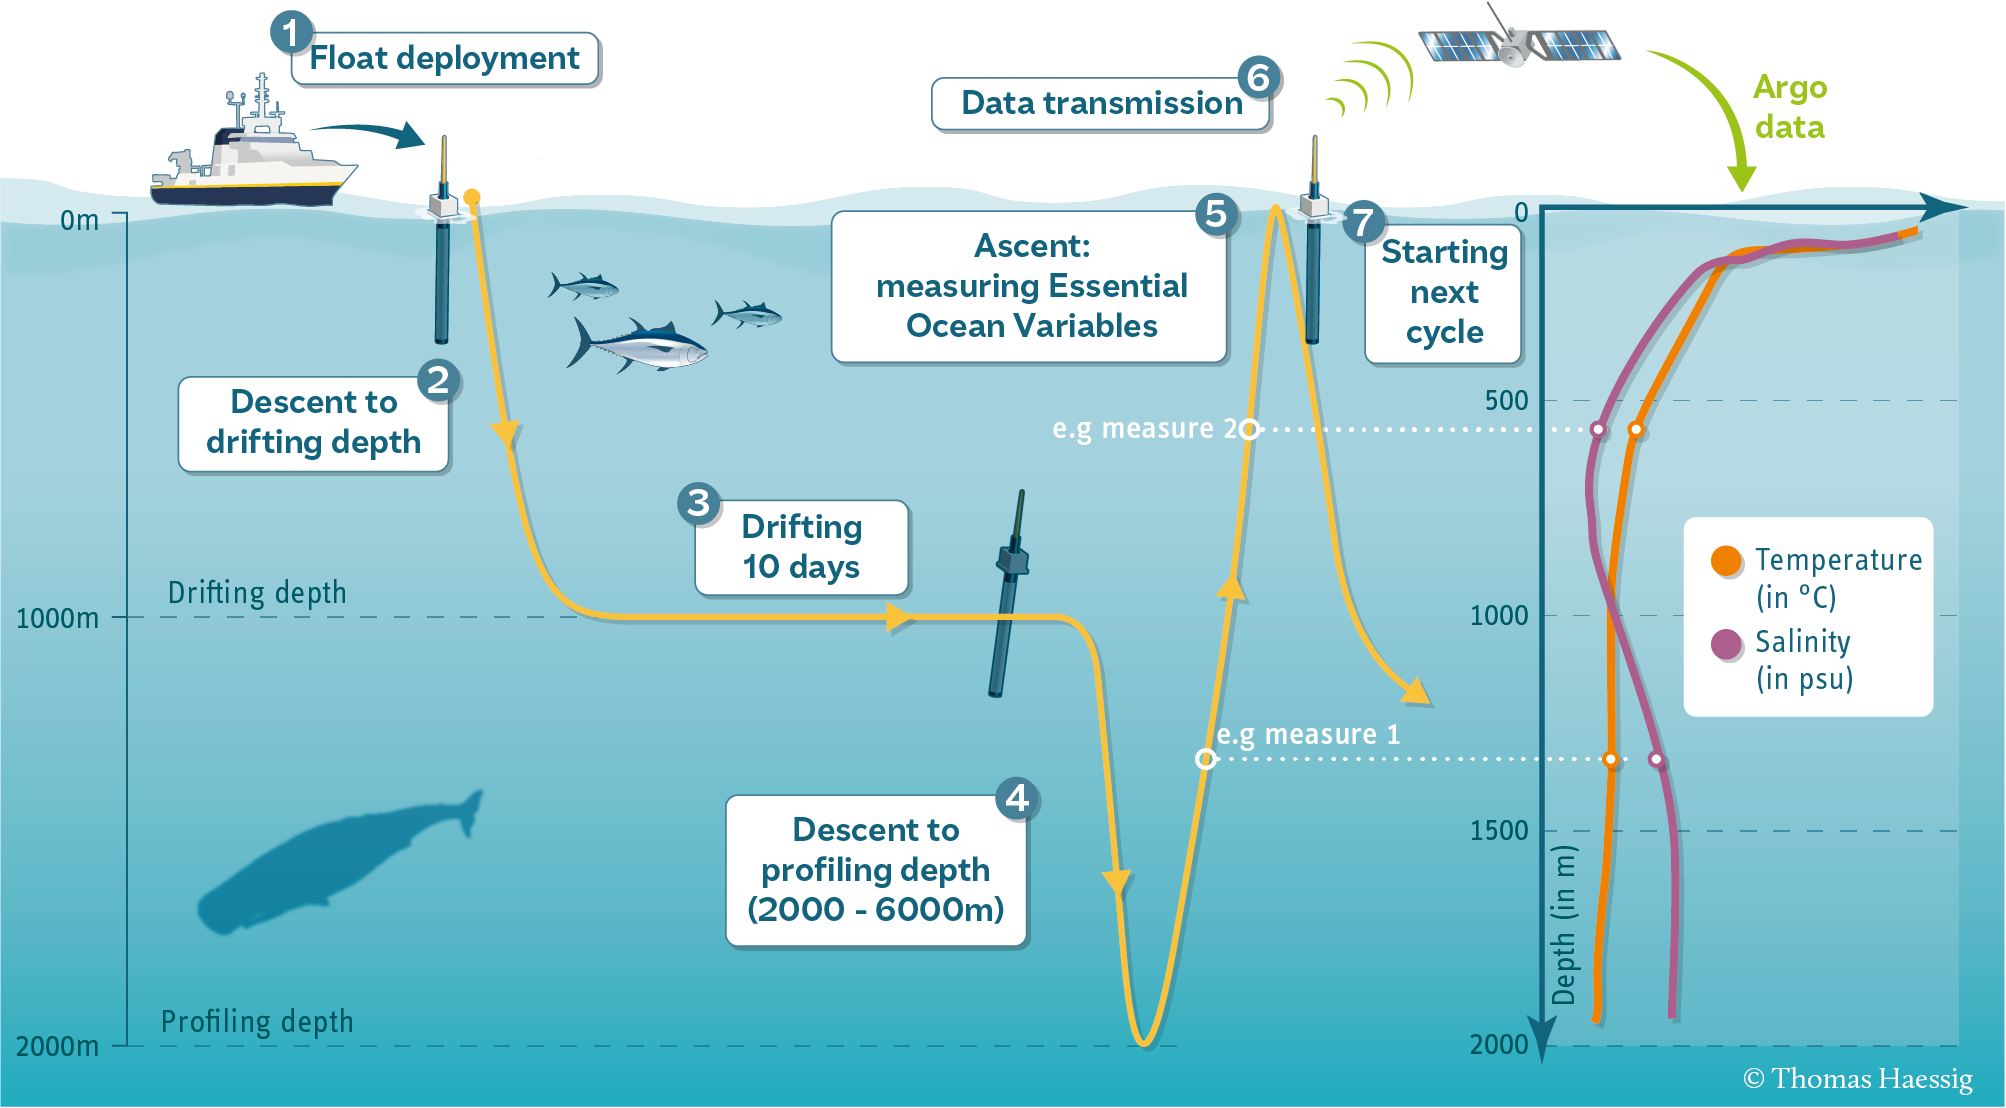


Chaque profil est associ√© √† une latitude, une longitude et une date, ainsi qu'√† de nombreux niveaux diff√©rents.

Commen√ßons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour t√©l√©charger les fichiers de donn√©es dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir √† l'√©tape suivante.

In [ ]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

import numpy as np


Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


In [ ]:
import numpy as np # importation de numpy

np.__version__ # version de numpy pour v√©rifier que c'est bien charg√©


'1.26.4'

**Q1) Chargez chaque fichier de donn√©es sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : temp√©rature

`S` : salinit√©

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les √©l√©ments dans `files`) pour savoir quel fichier correspond √† quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des √©l√©ments des fichiers ici

In [ ]:
import numpy as np

# Initialiser des variables vides (none) pour chaque donn√©e :
T, S, P, date, lat, lon, level = None, None, None, None, None, None, None

# V√©rifier l'ordre
print(files) # pour v√©rifier l'ordre dans files


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compr√©hension de liste

In [ ]:
# Parcourir les fichiers dans "files" et charger chaque fichier selon son nom
date, T, level, lat, P, lon, S = [np.load(files[i]) for i in range(len(files))]

# les donn√©es charg√©es dans les variables respectives
print("Temp√©rature : ", T)
print("Salinit√© : ", S)
print("Pression : ", P)
print("Latitude : ", lat)
print("Longitude : ", lon)
print("Date : ", date)
print("Niveau : ", level)


Temp√©rature :  [[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]
Salinit√© :  [[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ...         nan 34.93680954
   

**Q2) Recr√©ez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [√† ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [ ]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recr√©er le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [ ]:
level_arange = np.arange(0, len(level))
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


V√©rifiez que `level` et `level_arange` sont √©gaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_arange)


Recr√©er le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [ ]:
level_linspace = np.linspace(0,len(level)-1,len(level))
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


V√©rifiez que `level` et `level_linspace` sont √©gaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport √† `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont li√©s ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables charg√©es

In [ ]:
level_linspace.shape
print(level_linspace.shape) # afficher la taille (nbr ligne, nbr de colonne) du tableau

(78,)


In [ ]:
print(lon.shape)
print(lat.shape)
print(date.shape)
print(T.shape)
print(S.shape)
print(P.shape)
print(level.shape)

# il y a 75 points de longitude/latitude √† une date
# on a 78 niveaux de profondeur avec 75 T, S et P

(75,)
(75,)
(75,)
(78, 75)
(78, 75)
(78, 75)
(78,)


D'apr√®s les formes, quelles sont les dimensions partag√©es entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densit√© de l'eau de mer `relative_density`, par rapport √† l'eau pure, en fonction de la temp√©rature, de la salinit√© et de la pression.**

`densit√©_relative`$ = œÅ -œÅ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

o√π :

* Les densit√©s $\rho$ et $œÅ_{Pure\ eau}$ sont exprim√©es en unit√©s $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la temp√©rature conservative $\Theta$ (en unit√©s Celcius) √† partir de la temp√©rature, de la salinit√© et de la pression est fournie ci-dessous.
* La temp√©rature $T$ est exprim√©e en unit√©s Celcius.
* La salinit√© $S$ est exprim√©e en unit√©s $g/kg$.
* La pression $p$ est exprim√©e en unit√©s $dbar$.

Astuce : Les tableaux `numpy` charg√©s `temperature`, `salinity`, et `pressure` ont d√©j√† les bonnes unit√©s et aucune conversion n'est n√©cessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [ ]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

print(a, b, c)

0.7718 -0.0844 -0.004561


Importons la biblioth√®que [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la temp√©rature conservative $\Theta$ √† partir de la temp√©rature, de la salinit√© et de la pression.

In [ ]:
!pip install gsw
from gsw import CT_from_t

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 29.3 MB/s eta 0:00:00


Maintenant, c'est √† vous de jouer. Voici l'√©quation pour √©viter d'avoir √† faire d√©filer la page vers le haut :

`densit√©_relative`$ = œÅ -œÅ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la temp√©rature conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [ ]:
CT = CT_from_t(S, T, P) # Teta
print(CT)

[[18.95038389 18.41702486 19.07746816 ... 19.0838613  21.79604023
  20.10691816]
 [18.7167823  18.37902205 19.05973411 ... 18.44249588 19.43744461
  20.10022206]
 [18.34343364 18.3522886  19.04195407 ... 18.20006431 19.23615405
  20.05124564]
 ...
 [ 3.6359899   3.65662809  3.64478998 ...  3.64962307  3.65341962
   3.70166094]
 [ 3.60272526  3.61639726  3.59575608 ...  3.59259633  3.58470724
   3.6437391 ]
 [ 3.57826951  3.58028581  3.55956863 ...         nan  3.54839488
          nan]]


Calculez la "densit√© relative" √† l'aide de l'√©quation ci-dessus.

In [ ]:
densite_relative = a*S + b*CT+ c*CT**2
print(densite_relative)

[[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


**Q4) Faites un graphique pour chaque colonne de donn√©es dans `T`, `S`, `P`, et
`densit√©_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la biblioth√®que [Matplotlib](https://matplotlib.org/) pour la visualisation, m√™me si nous ne l'avons pas encore √©tudi√©e en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles √† suivre ci-dessous. üòä

La premi√®re √©tape consiste √† importer Pyplot. Il suffit d'ex√©cuter le code ci-dessous.

In [ ]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'oc√©an, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en d√©duire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'√©chelle verticale doit utiliser les donn√©es `level` pour √™tre coh√©rente avec les conventions oc√©anographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de donn√©es. Le r√©sultat sera d√©sordonn√©, comme dans le graphique ci-dessous :

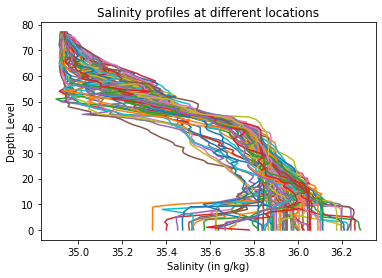

Text(0.5, 1.0, 'Salinity profiles at different locaitons')

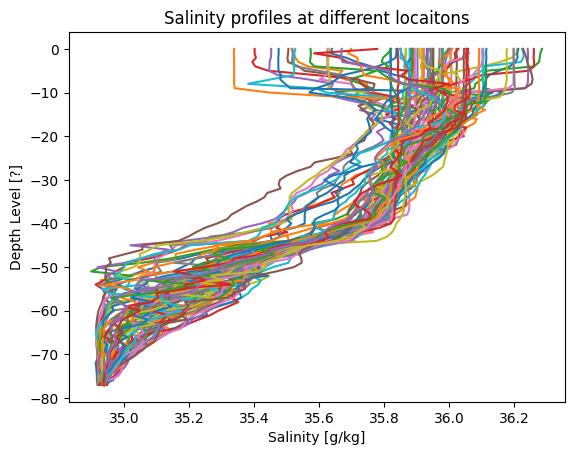

In [ ]:
plt.plot(S, -level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Salinity [g/kg]') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth Level [?]')
plt.title('Salinity profiles at different locaitons')

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Temprature profiles at different locations')

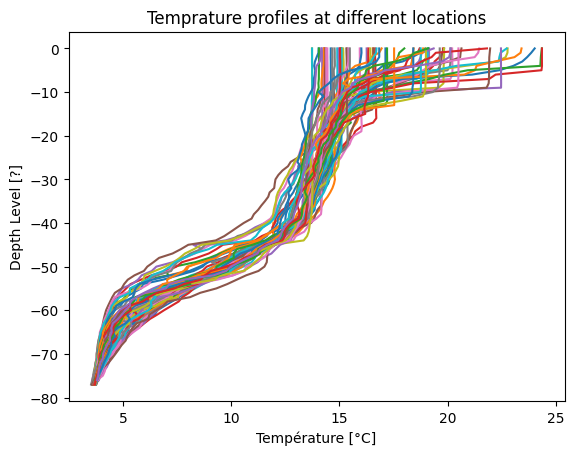

In [ ]:
plt.plot(T, -level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Temp√©rature [¬∞C]') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth Level [?]')
plt.title('Temprature profiles at different locations')

**Q5) Calculez la moyenne et l'√©cart-type de `T`, `S`, `P`, et `seawater_density` √† chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez v√©rifier que vous avez pris la moyenne et les √©carts types le long des axes corrects en v√©rifiant la "forme" de vos r√©sultats.

Calculer les moyennes...

In [ ]:
moyenne_T = np.mean(T,axis=1)
print(moyenne_T)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]


In [ ]:
moyenne_S = np.mean(S,axis=1)
print(moyenne_S)
moyenne_P = np.mean(P,axis=1)
print(moyenne_P)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
[   6.43466671           nan           nan         

... et les √©carts types.

In [ ]:
ecart_type_T = np.std(T,axis=1)
print(ecart_type_T)
ecart_type_S = np.std(S,axis=1)
print(ecart_type_S)
ecart_type_P = np.std(P,axis=1)
print(ecart_type_P)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

V√©rifiez qu'elles ont la m√™me forme que vos coordonn√©es de niveau vertical `lev` :

In [ ]:
np.testing.assert_equal(moyenne_T.shape,level.shape)

**Q6) Faites maintenant des trac√©s similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densit√©_de_l'eau_de_mer` √† chaque profondeur. Faites appara√Ætre les barres d'erreur sur chaque graphique en utilisant les √©carts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires √† celui ci-dessous

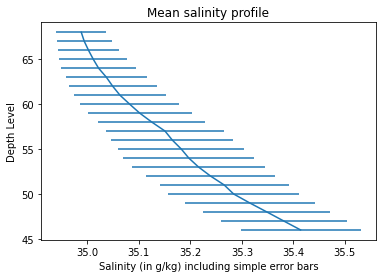

Text(0.5, 1.0, 'Profils de temp√©ratures moyennes')

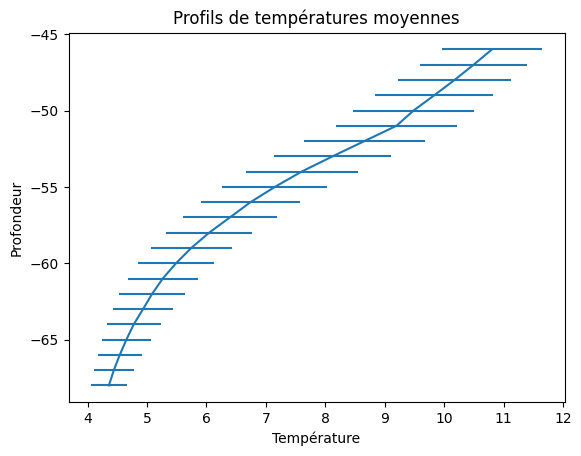

In [ ]:
plt.errorbar(moyenne_T, -level,xerr=ecart_type_T)
plt.xlabel('Temp√©rature')
plt.ylabel('Profondeur')
plt.title('Profils de temp√©ratures moyennes')

Encore trois plots et nous serons pr√™ts üôÇ .

Text(0.5, 1.0, 'Profils de salinit√© moyennes')

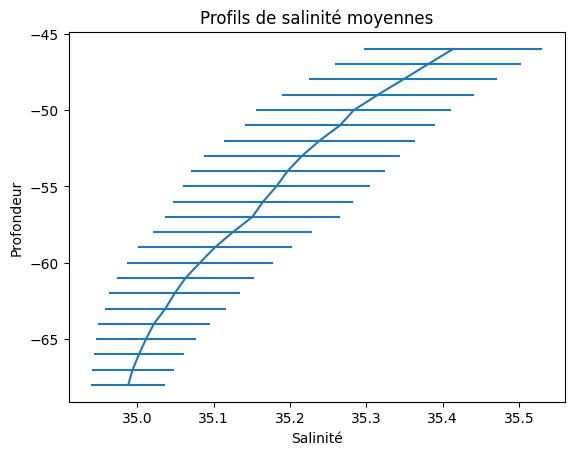

In [ ]:
plt.errorbar(moyenne_S, -level,xerr=ecart_type_S)
plt.xlabel('Salinit√©')
plt.ylabel('Profondeur')
plt.title('Profils de salinit√© moyennes')

Text(0.5, 1.0, 'Profils de pression moyennes')

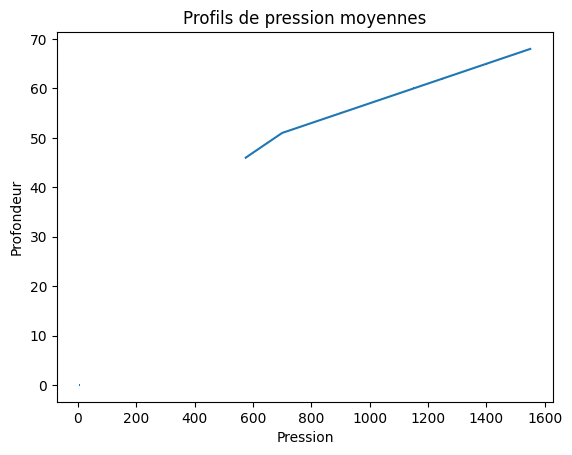

In [ ]:
plt.errorbar(moyenne_P, level,xerr=ecart_type_P)
plt.xlabel('Pression')
plt.ylabel('Profondeur')
plt.title('Profils de pression moyennes')

**Q7) Prise en compte des donn√©es manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiqu√©es par la valeur sp√©ciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'√©cart type des donn√©es contenant des NaN, le r√©sultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions sp√©ciales `np.nanmean` et `np.nanstd`, vous dites √† NumPy d'ignorer les NaN.

Recalculez les moyennes et les √©carts types comme dans les sections pr√©c√©dentes en utilisant ces fonctions et tracez les r√©sultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous esp√©rons que vous pouvez maintenant trouver la syntaxe compl√®te vous-m√™me üòé

In [ ]:
nanmean_T = np.nanmean(T, axis=1)
print(nanmean_T)

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]


De m√™me, recalculez les √©carts types en ignorant les valeurs manquantes.

In [ ]:
Nan_ecart_type_T = np.nanstd(T, axis=1)
print(Nan_ecart_type_T)

[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]


**Q8) Cr√©ez un diagramme de dispersion des coordonn√©es longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parl√© dans le tutoriel, mais il existe une fonction de diagramme de dispersion tr√®s pratique appel√©e [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos √©tiquettes en ajoutant un argument `fontsize=` aux fonctions d'√©tiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) list√©s dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'ARGO float location')

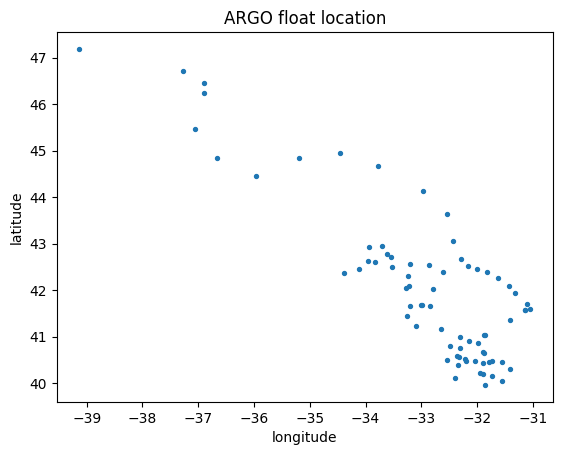

In [ ]:
plt.scatter(lon, lat, s=8)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('ARGO float location')

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [ ]:
# Write your code here
planetdict = {'mercure':0.330,'v√©nus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
#write function here
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# cr√©er une variable masse, qui est vide (none) au d√©part
mass=None
def convert_mass_Mterre(mass): # cr√©er une fonction qui prend la masse comme param√®tre
  return mass/planetdict['terre'] # je lui demande de retourner la masse d'entr√©e divis√© par la masse de la terre (qui est dans le dico)

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict['jupiter']) # j'appelle ma fonction pour diviser jupiter

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-cl√© que vous avez sp√©cifi√©**.

In [ ]:
# √âcrivez votre fonction ici
def convert_m_Mterrejupiter(mass=None,ourplanet='jupiter') :
  return mass/planetdict[ourplanet]

# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'], 'terre'),convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183 1.0


In [ ]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unit√© que vous avez choisie [la plan√®te que vous voulez]).

In [ ]:
# √âcrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='mars') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La plan√®te que vous voulez utiliser comme r√©f√©rence
  return a,b
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)
print(mass_conversion_two_arguments(Mjupiter,'mars'))

(0.16750418760469013, 1.557632398753894)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unit√© que vous avez choisie
# Retrouvez-vous la valeur originale ?